In [22]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
train = pd.read_csv('train.csv')
train.shape

(1168, 81)

In [24]:
train.head(3).T

,0,1,2
Id,893,1106,414
MSSubClass,20,60,30
MSZoning,RL,RL,RM
LotFrontage,70,98,56
LotArea,8414,12256,8960
...,...,...,...
MoSold,2,4,3
YrSold,2006,2010,2010
SaleType,WD,WD,WD
SaleCondition,Normal,Normal,Normal


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      964 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            70 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-nu

In [26]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,720.240582,420.237685,1.0,355.75,716.5,1080.25,1460.0
MSSubClass,1168.0,56.699486,41.814065,20.0,20.00,50.0,70.00,190.0
LotFrontage,964.0,70.271784,25.019386,21.0,59.00,69.5,80.00,313.0
LotArea,1168.0,10597.720890,10684.958323,1477.0,7560.00,9463.0,11601.50,215245.0
OverallQual,1168.0,6.095034,1.403402,1.0,5.00,6.0,7.00,10.0
OverallCond,1168.0,5.594178,1.116842,1.0,5.00,5.0,6.00,9.0
YearBuilt,1168.0,1971.120719,30.279560,1872.0,1954.00,1972.0,2000.00,2009.0
YearRemodAdd,1168.0,1985.200342,20.498566,1950.0,1968.00,1994.0,2004.00,2010.0
MasVnrArea,1160.0,104.620690,183.996031,0.0,0.00,0.0,166.25,1600.0
BsmtFinSF1,1168.0,444.345890,466.278751,0.0,0.00,384.0,706.50,5644.0


In [27]:
train.drop(columns=['Id'], inplace=True)

In [28]:
columns_with_miss = train.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 19


PoolQC          1164
MiscFeature     1129
Alley           1098
Fence            951
FireplaceQu      551
LotFrontage      204
GarageYrBlt       69
GarageType        69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtFinType2      31
BsmtExposure      31
BsmtFinType1      30
BsmtCond          30
BsmtQual          30
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [29]:
# Removing columns
train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)

In [30]:
train['FireplaceQu'].fillna(0, inplace=True)
train['FireplaceQu'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

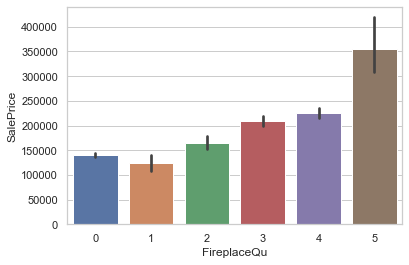

In [31]:
sns.set(style="whitegrid")
sns.barplot(x='FireplaceQu', y="SalePrice", data=train)

In [32]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
c = list(columns_with_miss.index)
c.append('SalePrice')
train[c].corr()

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
LotFrontage,1.000000,0.196649,0.089542,0.371839
MasVnrArea,0.196649,1.000000,0.253348,0.478724
GarageYrBlt,0.089542,0.253348,1.000000,0.496575
SalePrice,0.371839,0.478724,0.496575,1.000000


In [33]:
cols_to_be_removed = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
train.drop(columns=cols_to_be_removed, inplace=True)

In [34]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 11


GarageCond      69
GarageQual      69
GarageFinish    69
GarageType      69
BsmtFinType2    31
BsmtExposure    31
BsmtFinType1    30
BsmtCond        30
BsmtQual        30
MasVnrType       8
Electrical       1
dtype: int64

In [35]:
# Fills NA in place of NaN
for c in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1']:
    train[c].fillna('NA', inplace=True)
    
# Fills None in place of NaN
train['MasVnrType'].fillna('None', inplace=True)

In [36]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 5


GarageCond    69
GarageQual    69
BsmtCond      30
BsmtQual      30
Electrical     1
dtype: int64

In [37]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
for col in ord_cols:
    train[col].fillna(0, inplace=True)
    train[col].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

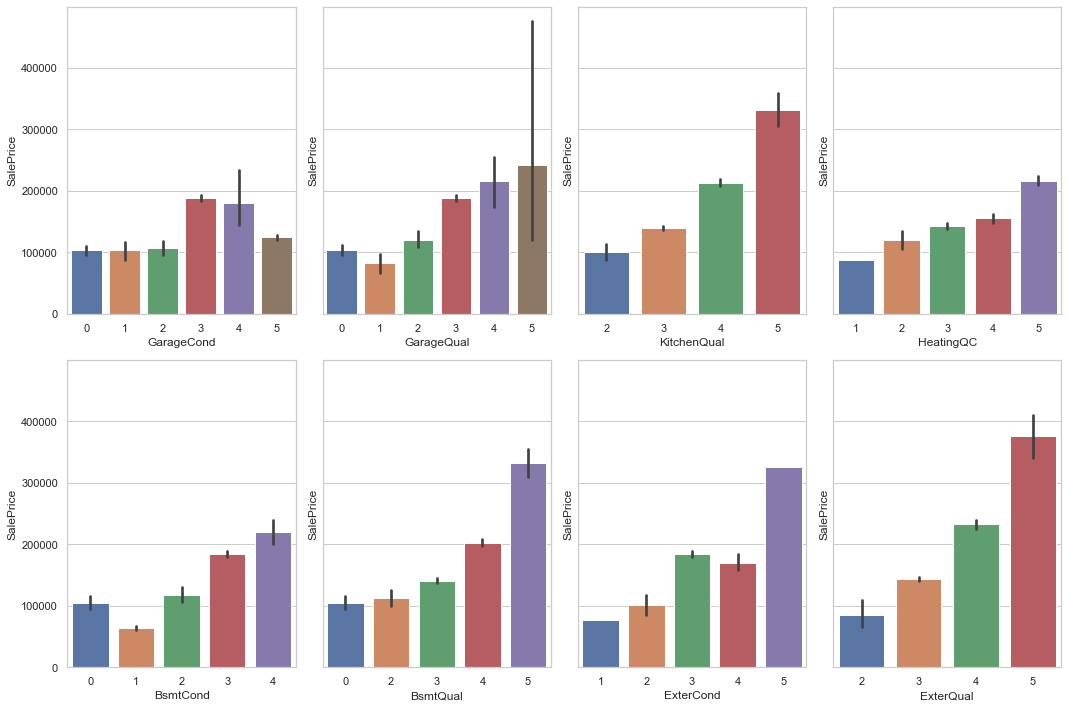

In [38]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
f, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)

for r in range(0, 2):
    for c in range(0, 4):
        sns.barplot(x=ord_cols.pop(), y="SalePrice", data=train, ax=axes[r][c])

plt.tight_layout()
plt.show()

In [39]:
cols = train.columns
num_cols = train._get_numeric_data().columns
nom_cols = list(set(cols) - set(num_cols))
print(f'Nominal columns: {len(nom_cols)}')

value_counts = {}
for c in nom_cols:
    value_counts[c] = len(train[c].value_counts())

sorted_value_counts = {k: v for k, v in sorted(value_counts.items(), key=lambda item: item[1])}
sorted_value_counts

Nominal columns: 31


{'CentralAir': 2,
 'Utilities': 2,
 'Street': 2,
 'PavedDrive': 3,
 'LandSlope': 3,
 'GarageFinish': 4,
 'MasVnrType': 4,
 'LotShape': 4,
 'LandContour': 4,
 'LotConfig': 5,
 'BldgType': 5,
 'BsmtCond': 5,
 'Heating': 5,
 'MSZoning': 5,
 'BsmtExposure': 5,
 'Electrical': 5,
 'SaleCondition': 6,
 'RoofStyle': 6,
 'Foundation': 6,
 'Functional': 7,
 'GarageType': 7,
 'RoofMatl': 7,
 'BsmtFinType1': 7,
 'BsmtFinType2': 7,
 'Condition2': 8,
 'HouseStyle': 8,
 'Condition1': 9,
 'SaleType': 9,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'Neighborhood': 25}

In [40]:
nom_cols_less_than_6 = []
for c in nom_cols:
    n_values = len(train[c].value_counts())
    if n_values < 7:
        nom_cols_less_than_6.append(c)

print(f'Nominal columns with less than 6 values: {len(nom_cols_less_than_6)}')

Nominal columns with less than 6 values: 19


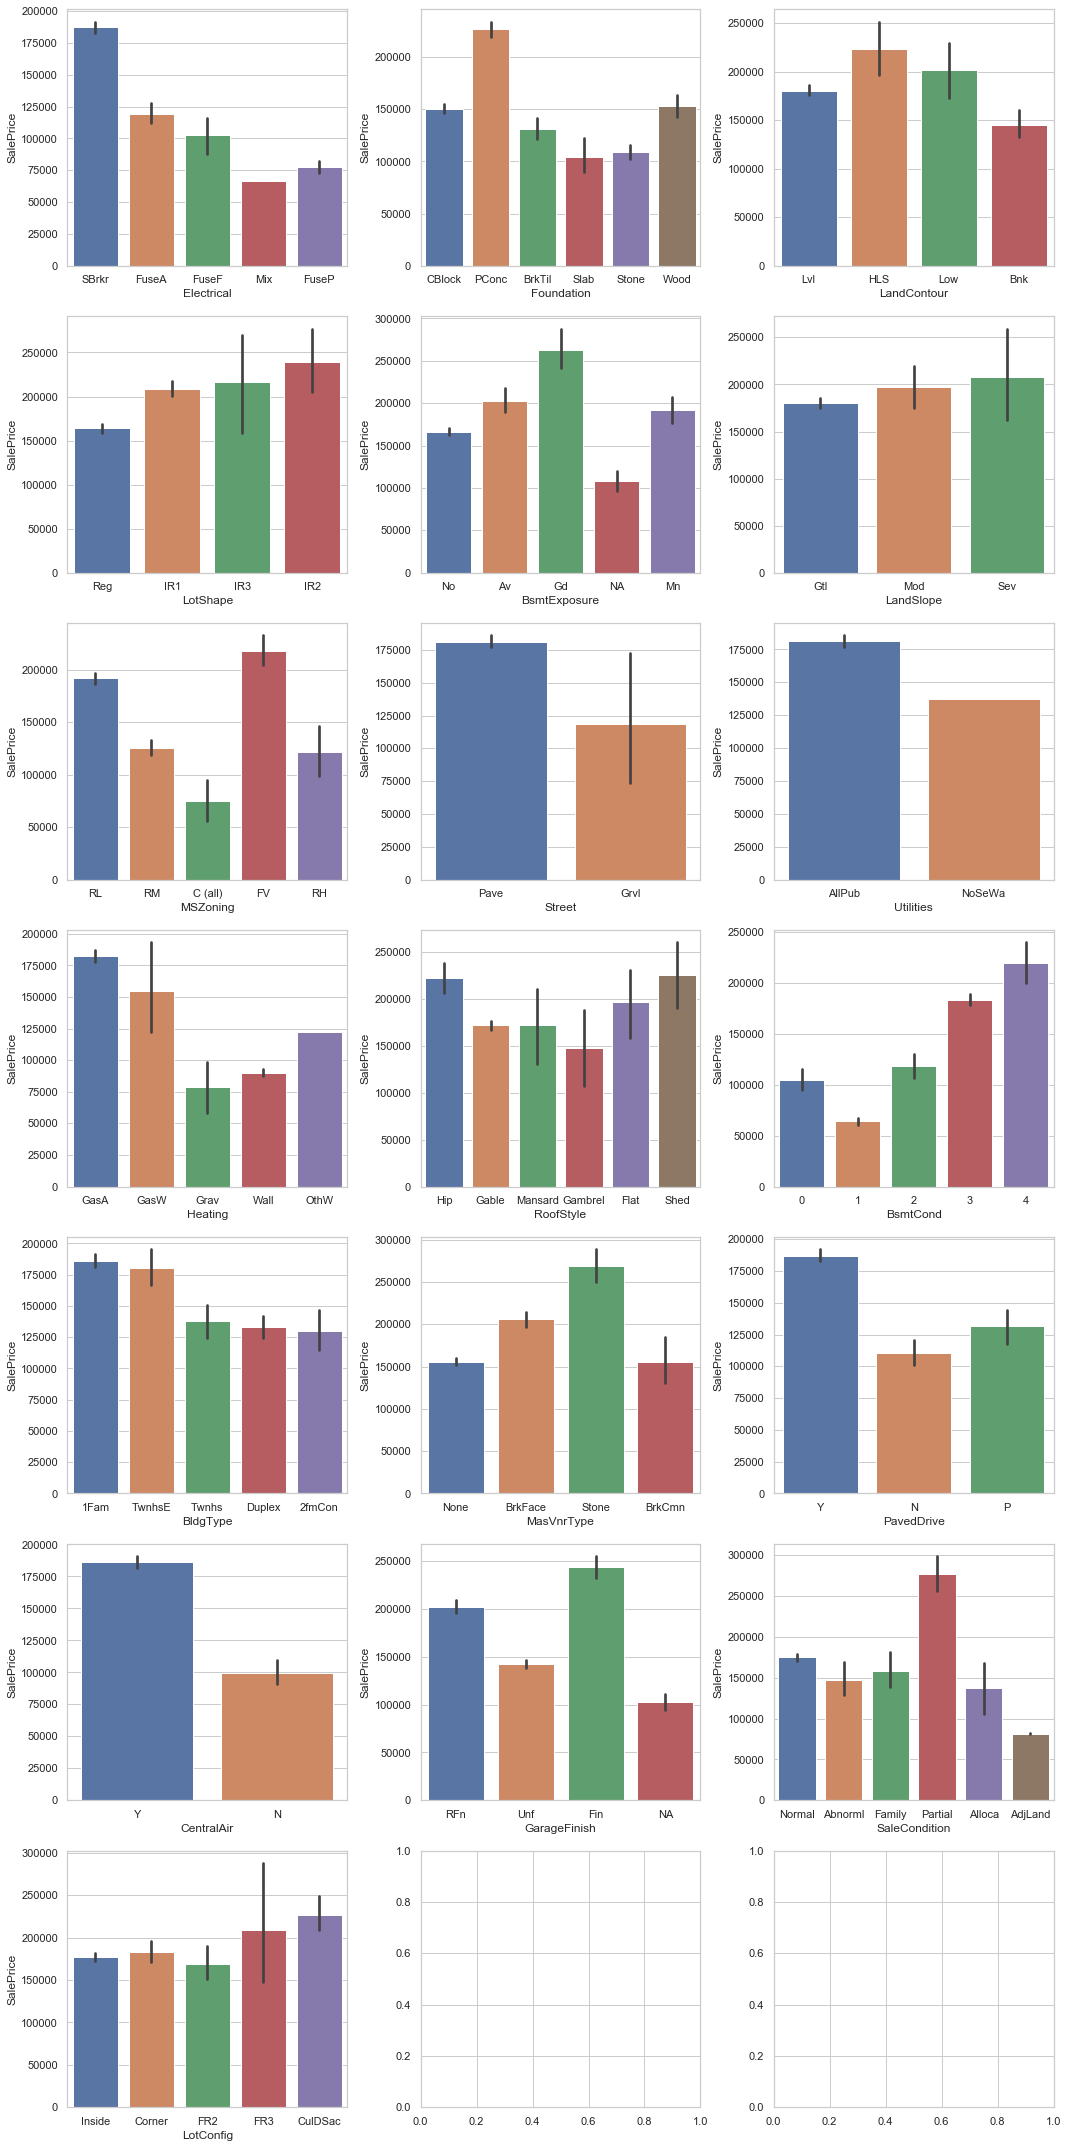

In [41]:
ncols = 3
nrows = math.ceil(len(nom_cols_less_than_6) / ncols)
f, axes = plt.subplots(nrows, ncols, figsize=(15, 30))

for r in range(0, nrows):
    for c in range(0, ncols):
        if not nom_cols_less_than_6:
            continue
        sns.barplot(x=nom_cols_less_than_6.pop(), y="SalePrice", data=train, ax=axes[r][c])

plt.tight_layout()
plt.show()

In [42]:
# Inputs more frequent value in place of NaN

train['Electrical'].fillna('SBrkr', inplace=True)

In [43]:
train.isin([0]).sum().sort_values(ascending=False).head(25)

PoolArea         1164
LowQualFinSF     1148
3SsnPorch        1148
MiscVal          1131
BsmtHalfBath     1097
ScreenPorch      1079
BsmtFinSF2       1033
EnclosedPorch    1007
HalfBath          727
BsmtFullBath      686
2ndFlrSF          655
WoodDeckSF        610
Fireplaces        551
FireplaceQu       551
OpenPorchSF       534
BsmtFinSF1        382
BsmtUnfSF          98
GarageCars         69
GarageArea         69
GarageCond         69
GarageQual         69
TotalBsmtSF        30
BsmtCond           30
BsmtQual           30
FullBath            8
dtype: int64

In [44]:
# Get only numerical columns
numerical_columns = list(train.dtypes[train.dtypes == 'int64'].index)
len(numerical_columns)

42

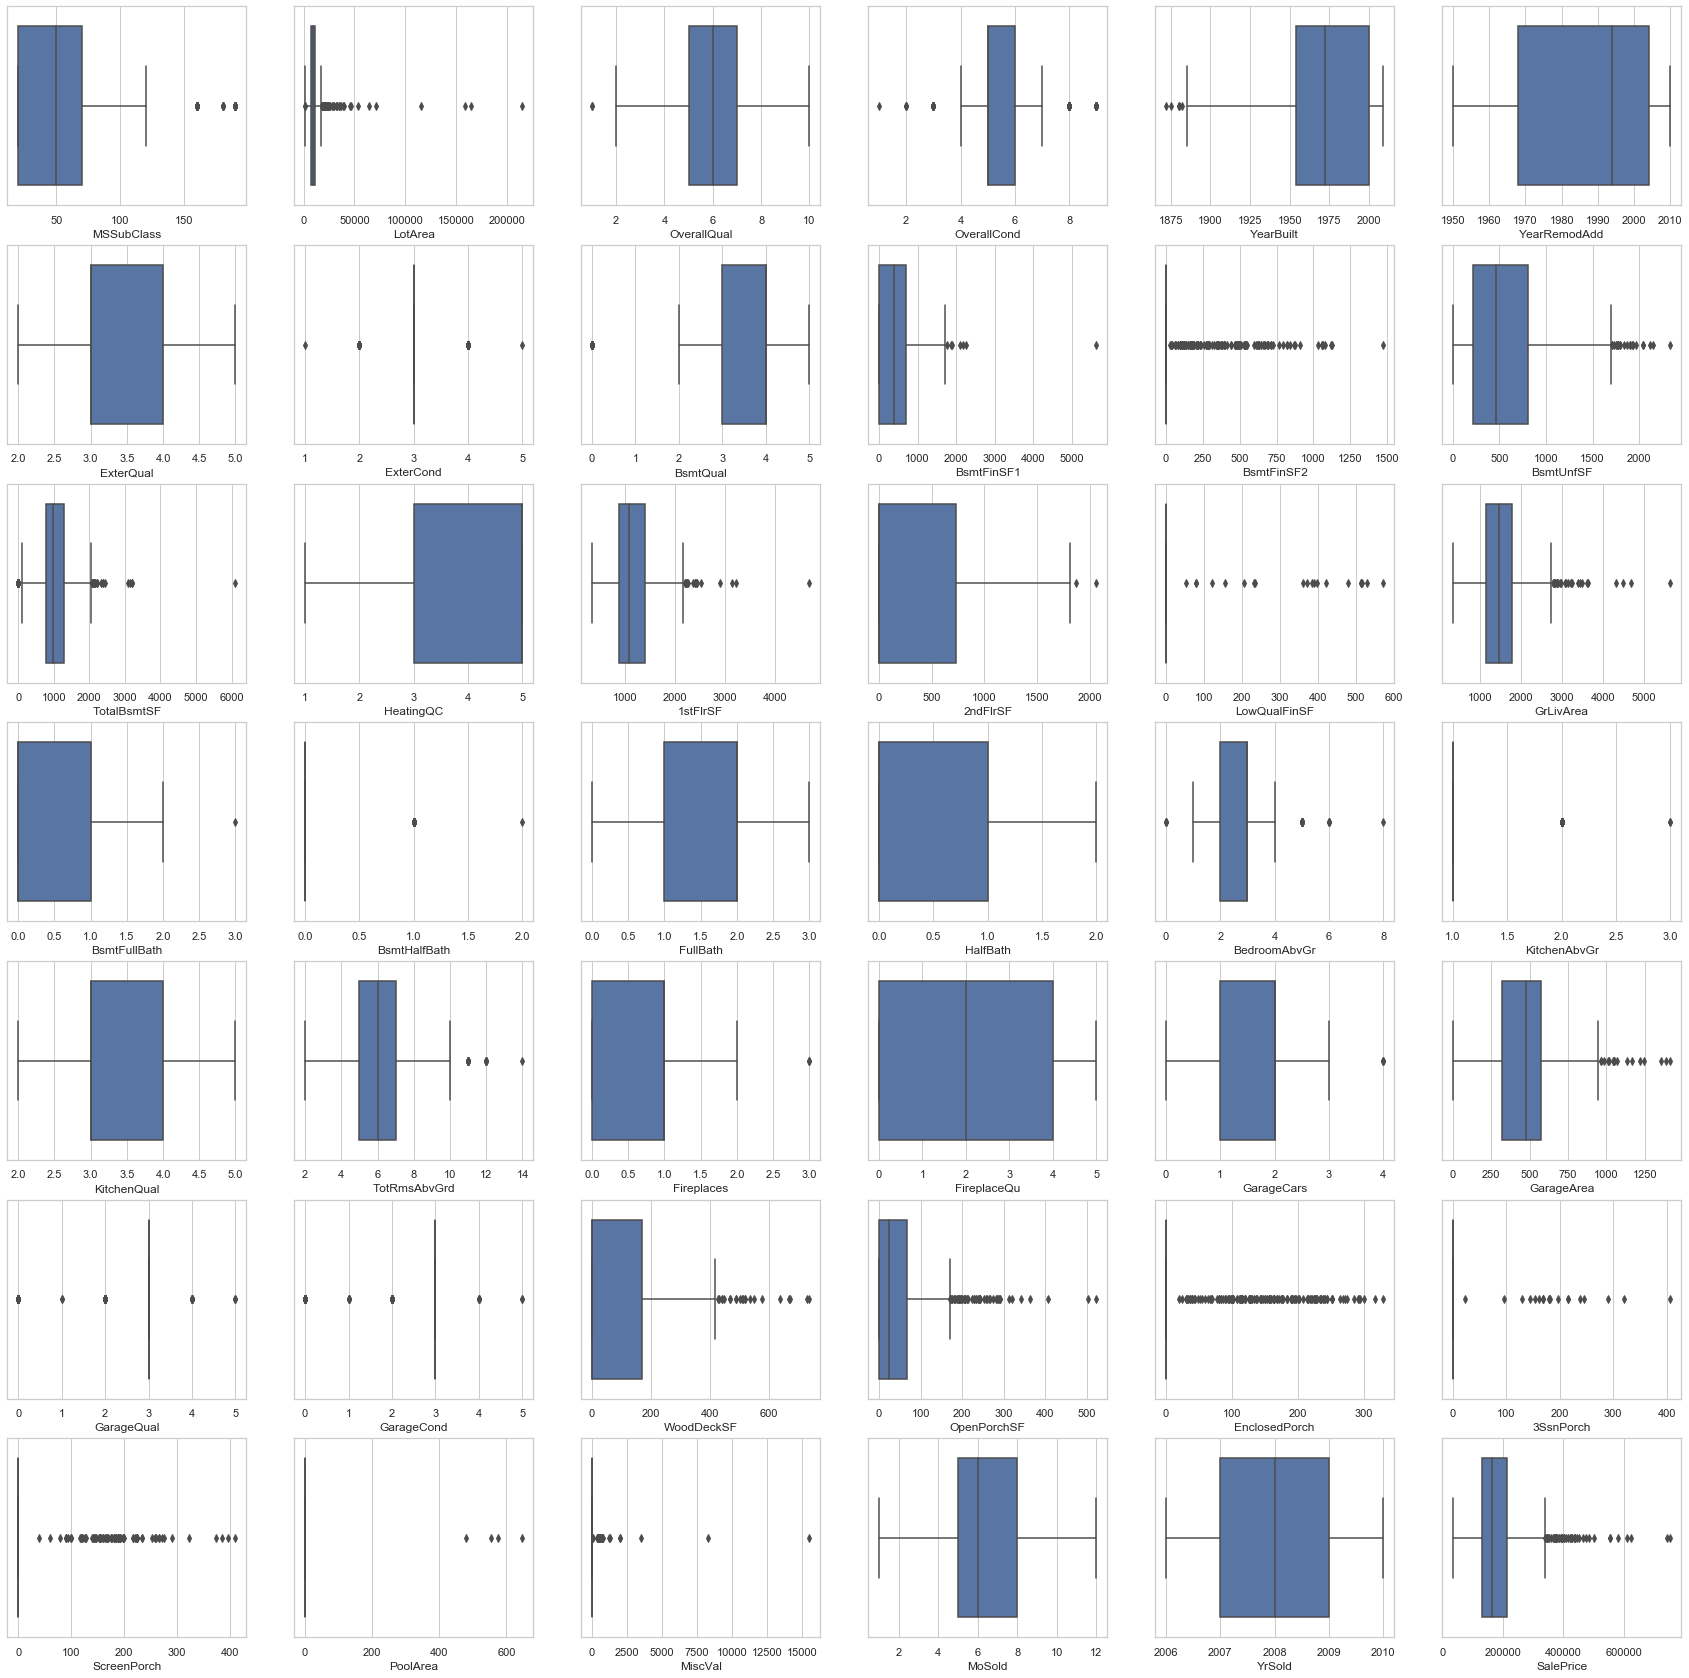

In [45]:
# Create the plot grid
rows = 7
columns = 6

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=train[column], ax=axes[x, y])
    
    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

In [46]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 0


Series([], dtype: int64)

In [47]:
train.shape

(1168, 73)

In [48]:
train.head(3).T

,0,1,2
MSSubClass,20,60,30
MSZoning,RL,RL,RM
LotArea,8414,12256,8960
Street,Pave,Pave,Pave
LotShape,Reg,IR1,Reg
...,...,...,...
MoSold,2,4,3
YrSold,2006,2010,2010
SaleType,WD,WD,WD
SaleCondition,Normal,Normal,Normal


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 73 columns):
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotArea          1168 non-null int64
Street           1168 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-null object
Exterior2nd      1168 non-null object
MasVnrType       1168 non-null object
ExterQual        1168 non

In [50]:
train.to_csv('train-cleaned.csv')